In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df.shape

(69301, 13)

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.drop('id',axis=1,inplace=True)
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(69277, 12)

In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


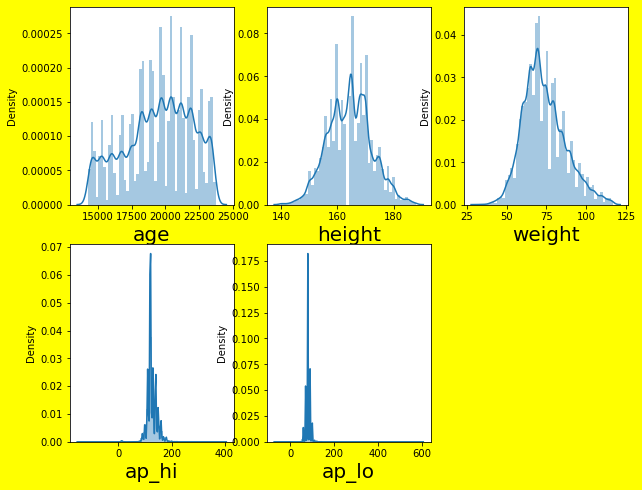

In [11]:
plt.figure(figsize=(10,8),facecolor='yellow')
plotnumber=1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [12]:
from scipy.stats import zscore
z_score=zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score < 3).all(axis=1)
df=df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65672.000000,65672.000000,65672.000000,65672.000000,65672.000000,65672.000000,65672.000000,65672.000000,65672.000000,65672.000000,65672.000000,65672.000000
mean,19456.330491,1.345749,164.376584,73.304425,125.713744,80.953222,1.357184,1.220612,0.086597,0.052488,0.804346,0.486768
std,2468.044470,0.475615,7.608381,12.881936,15.161605,8.873441,0.673862,0.566587,0.281246,0.223011,0.396706,0.499829
min,14275.000000,1.000000,142.000000,34.000000,80.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17649.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19697.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21317.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,187.000000,113.000000,179.000000,111.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


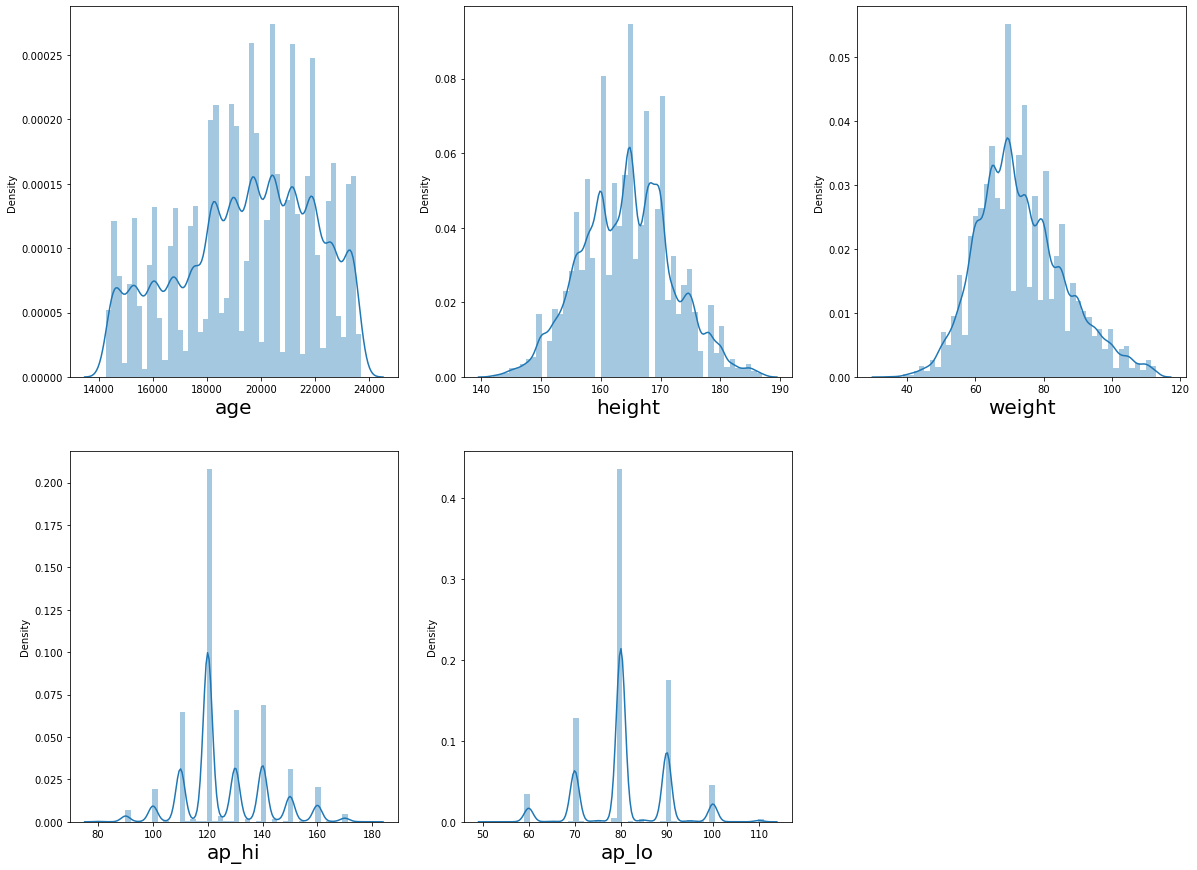

In [14]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [15]:
x=df.drop(columns=['cardio'])
y=df.cardio

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=94255)

In [17]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("=================Training Score===============")
        print("Accuracy Score ==> ",accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(x_test)
        print("=================Testing Score===============")
        print("Accuracy Score ==> ",accuracy_score(y_test,pred)*100)
        print("Classification Report==> ", classification_report(y_test,pred))

In [43]:
random_clf =RandomForestClassifier()

In [44]:
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=False)

=================Training Score===============
Accuracy Score ==>  99.97766678848419
=================Testing Score===============
Accuracy Score ==>  70.6176148130101
Classification Report==>                precision    recall  f1-score   support

           0       0.70      0.73      0.72      8350
           1       0.71      0.68      0.69      8068

    accuracy                           0.71     16418
   macro avg       0.71      0.71      0.71     16418
weighted avg       0.71      0.71      0.71     16418



In [47]:
params={'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,13],
       'min_samples_leaf':[5,8]}

grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)
print("Best_Params ==> ",grd.best_params_)

Best_Params ==>  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 13, 'n_estimators': 15}


In [48]:
random_clf=grd.best_estimator_
random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       min_samples_split=13, n_estimators=15)

In [49]:
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=False)

=================Training Score===============
Accuracy Score ==>  74.74722865148009
=================Testing Score===============
Accuracy Score ==>  72.6336947253015
Classification Report==>                precision    recall  f1-score   support

           0       0.71      0.79      0.75      8350
           1       0.75      0.66      0.70      8068

    accuracy                           0.73     16418
   macro avg       0.73      0.73      0.72     16418
weighted avg       0.73      0.73      0.72     16418



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import roc_curve, RocCurveDisplay

In [51]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [52]:
x=df.drop(columns=['cardio'],axis=1)
y=df.cardio

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=94062)

In [54]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
print("All Models are Trained")

All Models are Trained


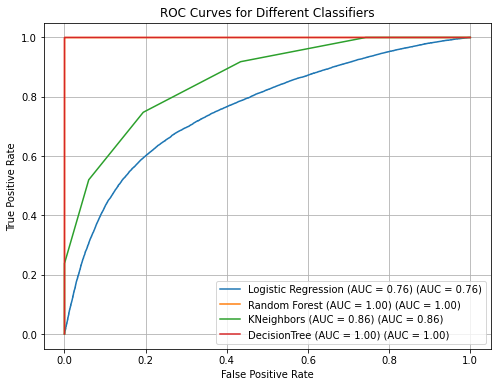

In [55]:
plt.figure(figsize=(8, 6))
classifiers = [lr,rf,knn,dt]
labels = ['Logistic Regression','Random Forest','KNeighbors','DecisionTree']
for clf, label in zip(classifiers, labels):
    y_score = clf.predict_proba(x_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_score)
    auc = roc_auc_score(y_train, y_score)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name=f'{label} (AUC = {auc:.2f})')
    roc_display.plot(ax=plt.gca())
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

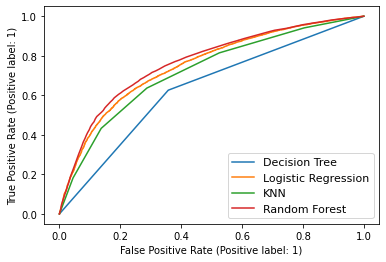

In [56]:
disp = RocCurveDisplay.from_estimator(dt, x_test, y_test)
RocCurveDisplay.from_estimator(lr, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=disp.ax_)
plt.legend(["Decision Tree", "Logistic Regression", "KNN", "Random Forest"], prop={'size': 11}, loc='lower right',)
plt.show()